In [1]:
# Importing libraries
# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
import seaborn as sns
 
# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#Dataset 
ami = pd.read_csv('cpdata.csv')
ami.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
print(f"No of data points -> {ami.shape[0]}")
print(f"No of features -> {ami.shape[1] - 1}")

No of data points -> 3100
No of features -> 4


In [5]:
outputlabels = ami['label'].unique()
print(f"There are {len(outputlabels)} output labels and they are : {outputlabels}")

There are 31 output labels and they are : ['rice' 'wheat' 'Mung Bean' 'Tea' 'millet' 'maize' 'Lentil' 'Jute'
 'Coffee' 'Cotton' 'Ground Nut' 'Peas' 'Rubber' 'Sugarcane' 'Tobacco'
 'Kidney Beans' 'Moth Beans' 'Coconut' 'Black gram' 'Adzuki Beans'
 'Pigeon Peas' 'Chickpea' 'banana' 'grapes' 'apple' 'mango' 'muskmelon'
 'orange' 'papaya' 'pomegranate' 'watermelon']


In [6]:
#DATA CLEANING

In [7]:
# Checking for null values
for index, value in ami.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

In [8]:
#There are no null values

In [9]:
#Checking for duplicate rows
print(f"Duplicate rows - {ami.duplicated().sum()}")

Duplicate rows - 0


In [10]:
#There are no duplicate rows

In [11]:
#EXPLORATORY DATA ANALYSIS

In [12]:
# Distribution of classes in target label
dist = ami['label'].value_counts()
for name, count in dist.iteritems():
    print(f"Number of data points in class: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")

Number of data points in class:       apple       is 100 (3.226%)
Number of data points in class:      Tobacco      is 100 (3.226%)
Number of data points in class:    Adzuki Beans   is 100 (3.226%)
Number of data points in class:     Sugarcane     is 100 (3.226%)
Number of data points in class:       banana      is 100 (3.226%)
Number of data points in class:     Mung Bean     is 100 (3.226%)
Number of data points in class:     Moth Beans    is 100 (3.226%)
Number of data points in class:    Kidney Beans   is 100 (3.226%)
Number of data points in class:     muskmelon     is 100 (3.226%)
Number of data points in class:       Cotton      is 100 (3.226%)
Number of data points in class:    pomegranate    is 100 (3.226%)
Number of data points in class:        Peas       is 100 (3.226%)
Number of data points in class:        Jute       is 100 (3.226%)
Number of data points in class:        Tea        is 100 (3.226%)
Number of data points in class:       grapes      is 100 (3.226%)
Number of 

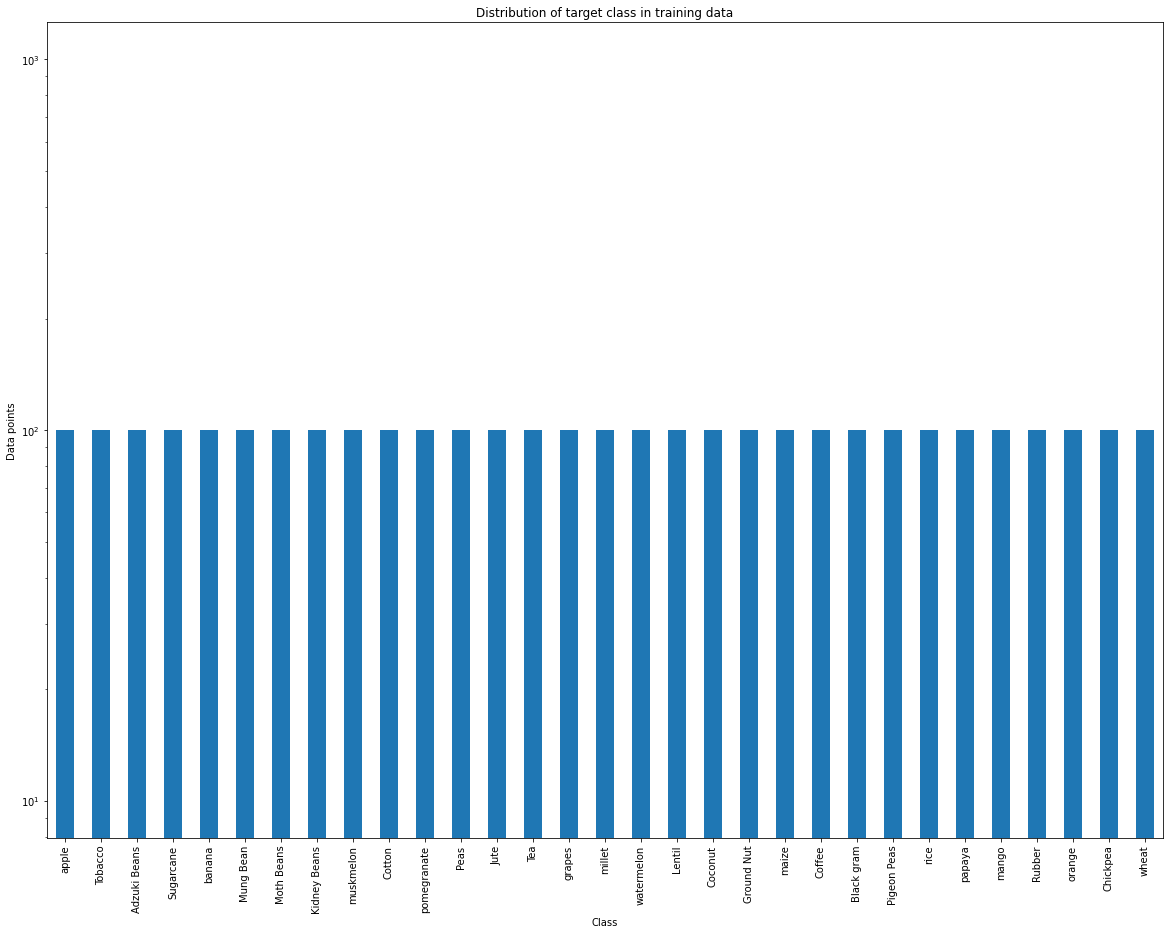

In [13]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

In [14]:
#The dataset is highly balanced and is ready for the learning

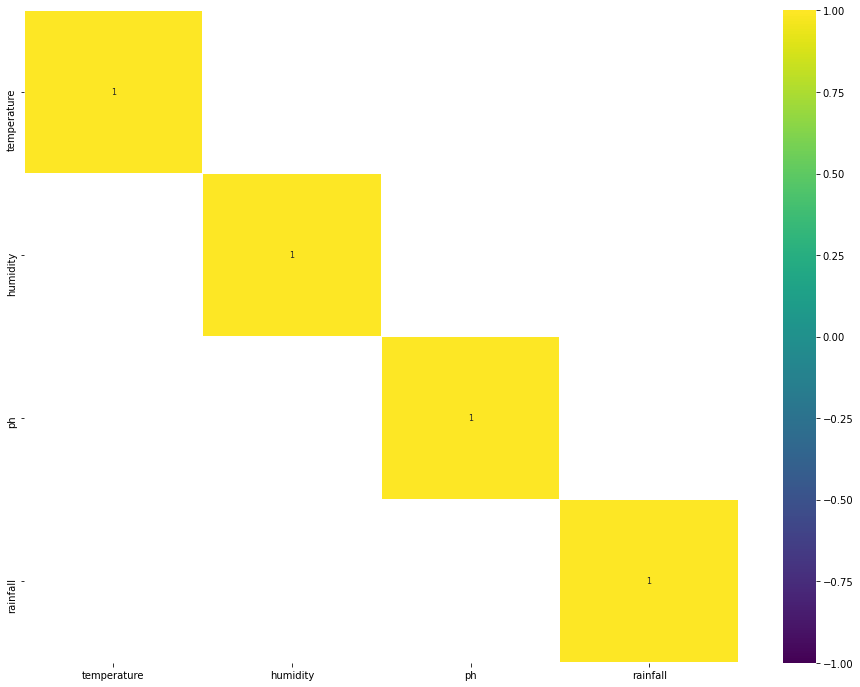

In [18]:
# Analysing feature to feature relationship

df_num = ami.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

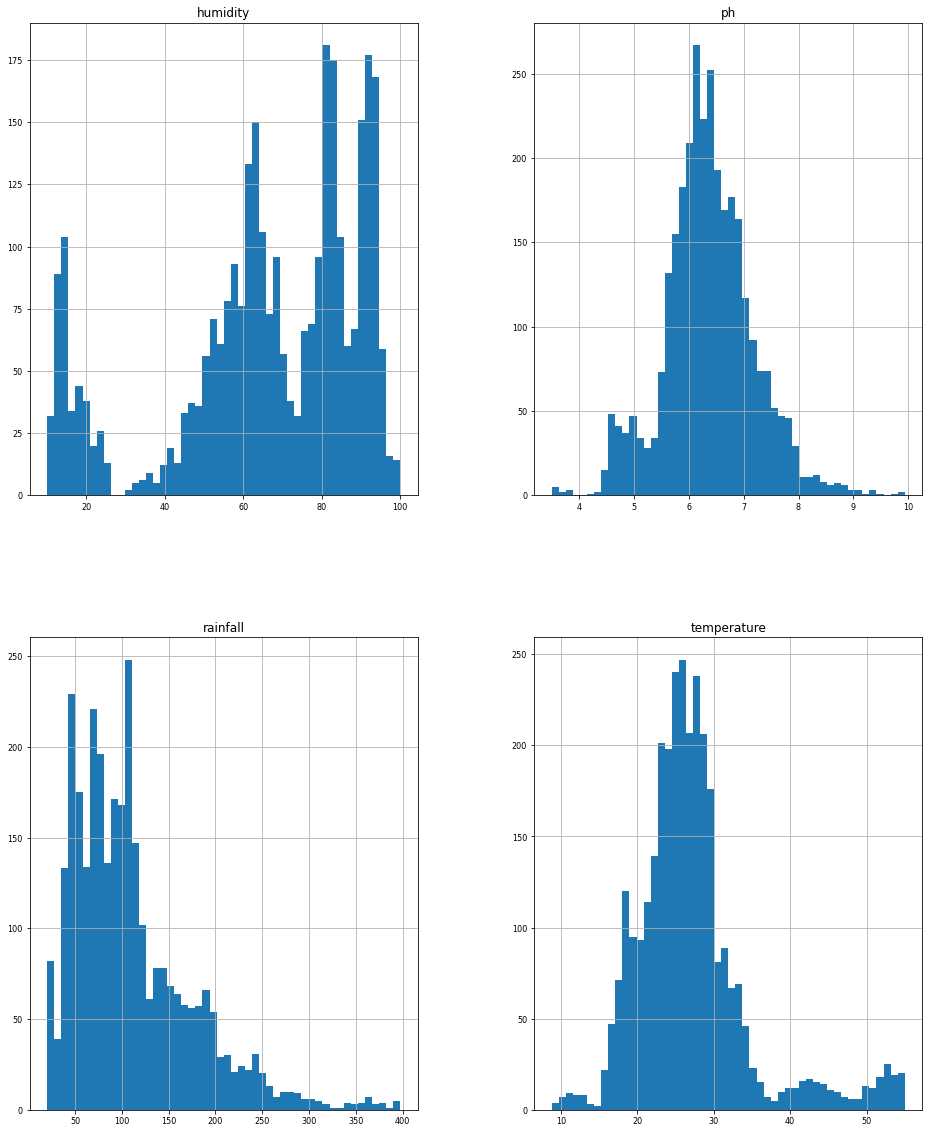

In [19]:
# Distribution of predictors/features
# A `histogram`_ is a representation of the distribution of data
# This function calls `matplotlib.pyplot.hist`, on each series in the DataFrame
# resulting in one histogram per column
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

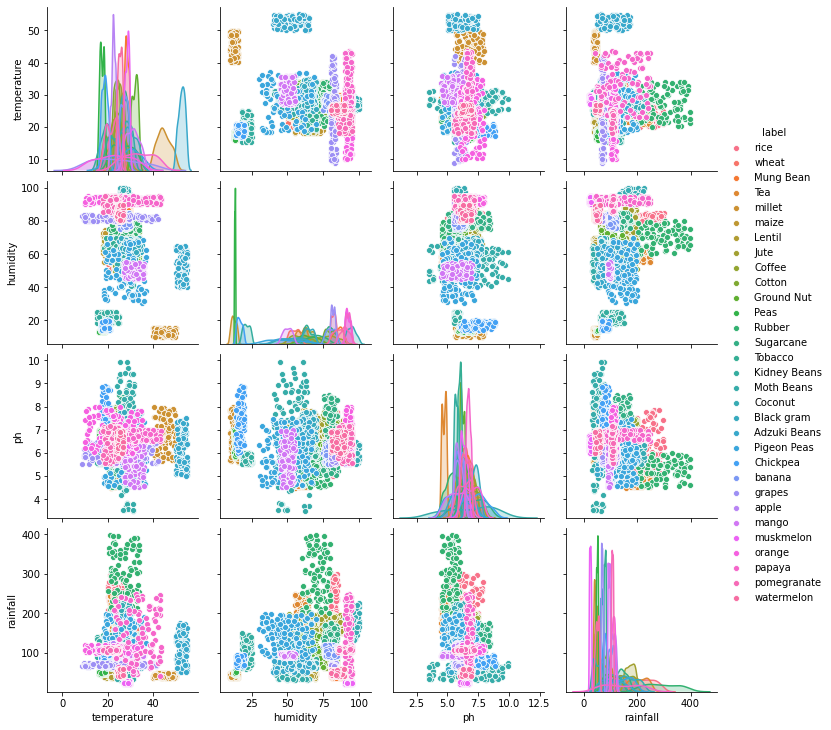

In [23]:
# Pair plots for bi-variate analyis
sns.pairplot(ami, hue='label', vars=['temperature', 'humidity', 'ph', 'rainfall'])

In [24]:
#We can see a fair amount of linear separability between the features
#So there is no need for dimensionality reduction

In [25]:
# Understanding various discrete predictors in dataset

In [27]:
pd.crosstab(ami.temperature, ami.label)

label,Adzuki Beans,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,Jute,Kidney Beans,Lentil,Moth Beans,Mung Bean,Peas,Pigeon Peas,Rubber,Sugarcane,Tea,Tobacco,apple,banana,grapes,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat
temperature,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8.825675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9.467960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9.535586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9.724458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9.851243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54.805221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54.817096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54.850131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
pd.crosstab(ami.humidity, ami.label)

label,Adzuki Beans,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,Jute,Kidney Beans,Lentil,Moth Beans,Mung Bean,Peas,Pigeon Peas,Rubber,Sugarcane,Tea,Tobacco,apple,banana,grapes,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat
humidity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.034048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10.036997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10.086890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10.094109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10.123916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.658092,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99.724010,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99.846716,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
pd.crosstab(ami.ph, ami.label)

label,Adzuki Beans,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,Jute,Kidney Beans,Lentil,Moth Beans,Mung Bean,Peas,Pigeon Peas,Rubber,Sugarcane,Tea,Tobacco,apple,banana,grapes,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat
ph,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.504752,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.510404,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.525366,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.532009,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.558823,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.416003,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.459493,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.679241,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
pd.crosstab(ami.rainfall, ami.label)

label,Adzuki Beans,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,Jute,Kidney Beans,Lentil,Moth Beans,Mung Bean,Peas,Pigeon Peas,Rubber,Sugarcane,Tea,Tobacco,apple,banana,grapes,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat
rainfall,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20.211267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20.360011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20.390205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20.490356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20.661278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390.356997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
391.419750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396.257512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#Vectorising the categorical output label for ease

In [33]:
labels = ami['label'].unique()
output = {key:idx for idx, key in enumerate(labels)}
target_col = []
for label in ami['label'].values:
    target_col.append(output[label])
ami['target'] = target_col

In [37]:
#Looking at our dataset now
ami.head()

,temperature,humidity,ph,rainfall,label,target
0,20.879744,82.002744,6.502985,202.935536,rice,0
1,21.770462,80.319644,7.038096,226.655537,rice,0
2,23.004459,82.320763,7.840207,263.964248,rice,0
3,26.491096,80.158363,6.980401,242.864034,rice,0
4,20.130175,81.604873,7.628473,262.717340,rice,0


In [38]:
ami.drop('label', inplace = True, axis = 1)
ami.head()

,temperature,humidity,ph,rainfall,target
0,20.879744,82.002744,6.502985,202.935536,0
1,21.770462,80.319644,7.038096,226.655537,0
2,23.004459,82.320763,7.840207,263.964248,0
3,26.491096,80.158363,6.980401,242.864034,0
4,20.130175,81.604873,7.628473,262.717340,0


In [35]:
#Now we have preprocessed all the features!
#In this project, we will be implementening multi class classification and predicting which crop will give the best yield to 
#farmers in a given temperature, humidity and rainfall parameters

In [40]:
#Shuffle the obtained dataset after concatenating 
ami = ami.sample(frac=1)
ami.head()

,temperature,humidity,ph,rainfall,target
1136,18.433686,13.822820,6.854527,48.804483,11
2240,26.597436,79.358989,6.210845,107.394472,22
963,25.689595,77.906210,6.470135,66.194268,9
664,27.521354,60.536577,6.551578,48.064913,6
2485,21.170892,90.237302,5.895319,123.649515,24


In [52]:
x_train = ami.drop(['target'],axis = 1)
y_train = ami['target']
test_size = int(0.2*len(ami))
x_test = ami.iloc[:test_size,:4]
y_test = ami.iloc[:test_size,4]
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((3100, 4), (3100,), (620, 4), (620,))

In [53]:
#Gaussian Naive Bayes Algorithm implementation from scratch

In [72]:
class GNB:
    def __init__(self, prior=None, n_class=None, mean=None, variance = None, classes=None):
        self.prior = prior
        self.n_class = n_class
        self.mean = mean
        self.variance = variance
        self.classes = classes

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.mean = np.array(x.groupby(by=y).mean())
        self.variance = np.array(x.groupby(by=y).var())
        self.n_class = len(np.unique(self.y))
        self.classes = np.unique(self.y)
        self.prior = 1/self.n_class
        return self

    def calc_mean_var(self):
        m = np.array(self.mean)
        v = np.array(self.variance)

        self.mean_var = []
        for i in range(len(m)):
            m_row = m[i]
            v_row = v[i]
            for a, b in enumerate(m_row):
                mean = b
                var = v_row[a]
                self.mean_var.append([mean, var])
        return self.mean_var

    def split(self):
        #print(np.array(self.calc_mean_var()), self.n_class)
        spt = np.vsplit(np.array(self.calc_mean_var()), self.n_class)
        return spt

    def gnb_base(self, x_val, x_mean, x_var):
        self.x_val = x_val
        self.x_mean = x_mean
        self.x_var = x_var
        
        pi = np.pi
        equation_1 = 1/(np.sqrt(2 * pi * x_var))
        denom = 2 * x_var
        numerator = (x_val - x_mean) ** 2
        expo = np.exp(-(numerator/denom))
        prob = equation_1 * expo

        return prob

    def predict(self, X):
        self.X = X
        split_class = self.split()
        prob = []
        for i in range(self.n_class):
            class_one = split_class[i]
            for i in range(len(class_one)):
                class_one_x_mean = class_one[i][0]
                class_one_x_var = class_one[i][1]
                x_value = X[i] 
                prob.append([self.gnb_base(x_value, class_one_x_mean, class_one_x_var)])

        prob_array = np.array(prob)
        prob_split = np.vsplit(prob_array, self.n_class)
        final_probabilities = []
        for i in prob_split:
            class_prob = np.prod(i) * self.prior
            final_probabilities.append(class_prob)

        maximum_prob = max(final_probabilities)
        prob_index = final_probabilities.index(maximum_prob)
        prediction = self.classes[prob_index]
        return prediction

In [73]:
gaussian_classifier = GNB()
gaussian_classifier.fit(x_train, y_train)

In [74]:
preds = []
for test in x_test.values:
    preds.append(gaussian_classifier.predict(test))
len(preds)

620

In [75]:
def fpr(y_test, y_pred):
    fp, negatives = 0, 0
    for i in range(len(y_test)):
        # Total number of bad connections
        if y_test[i] == 0:
            negatives += 1
        # If it is bad but predicted as normal
        if y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
            
    return fp, fp/negatives
fpr(y_test.values, preds)

from sklearn.metrics import accuracy_score
print(f"Accuracy of Naive bayes algorithm : {round(accuracy_score(preds, y_test.values) * 100, 2)}%")

Accuracy of Naive bayes algorithm : 92.9%


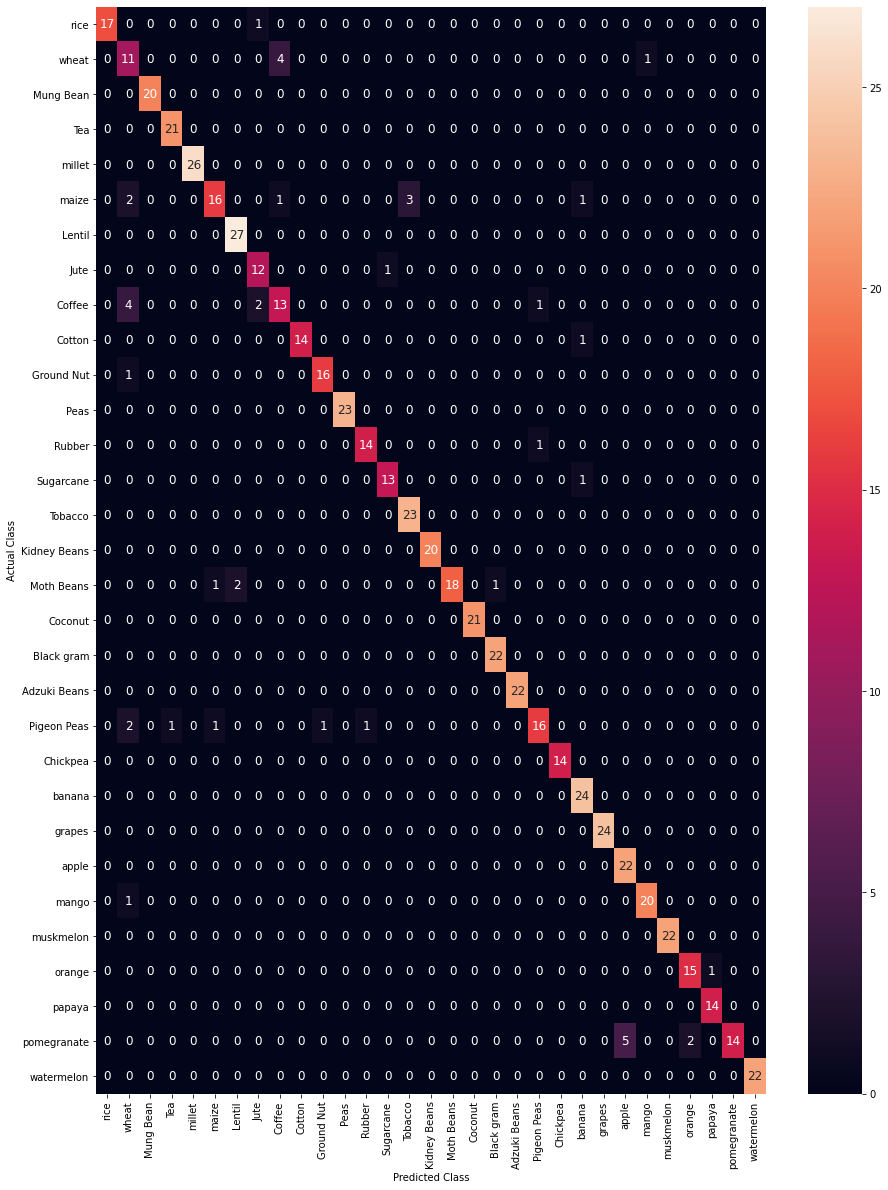

In [60]:
from sklearn.metrics import confusion_matrix

C = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(C)
labels = list(output.keys())
plt.figure(figsize=(15,20))
sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [71]:
#IMPLEMENTING KNN ALGORITHM USING SKLEARN FOR COMPARISON
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#Predicting the test set result  
y_pred= classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(f"Accuracy of KNN algorithm: {round(accuracy_score(y_pred, y_test.values) * 100, 2)}%")

Accuracy of KNN algorithm: 89.52%


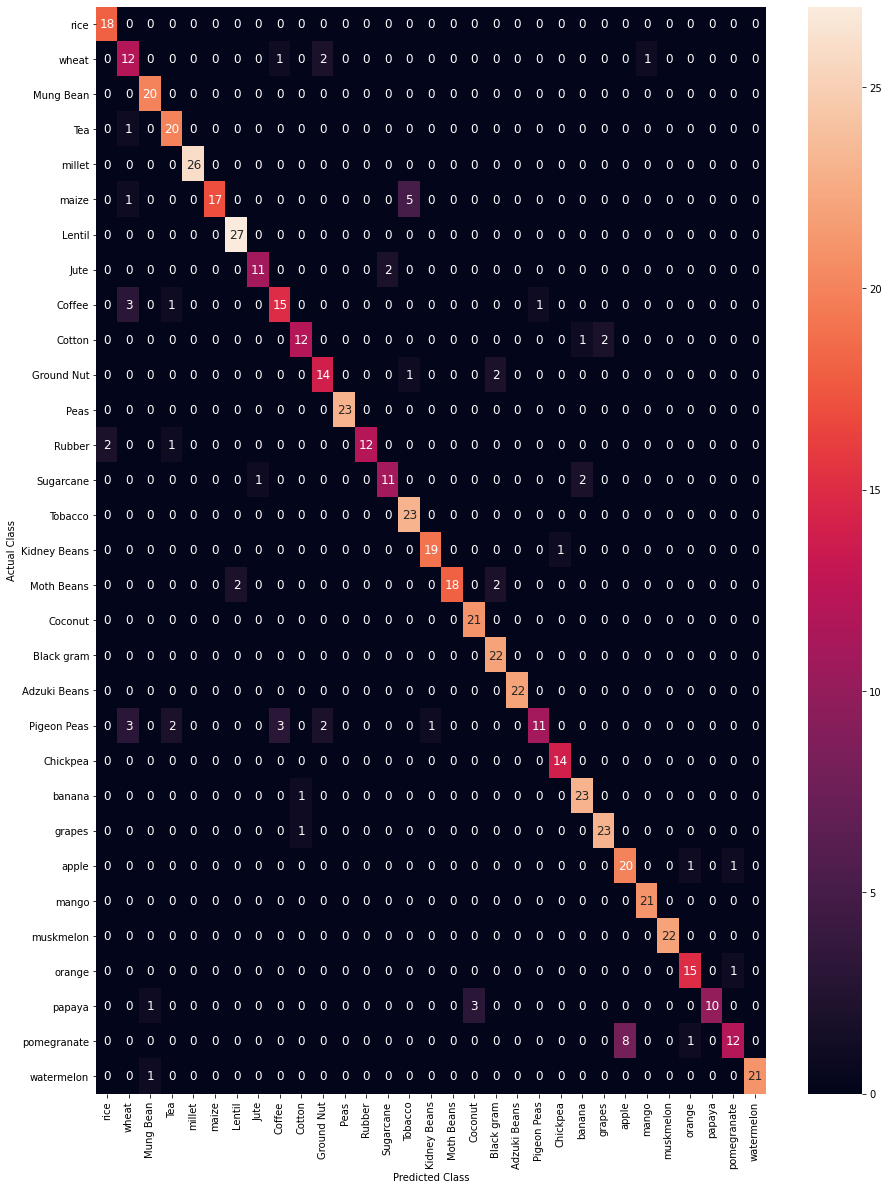

In [70]:
from sklearn.metrics import confusion_matrix

C = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(C)
labels = list(output.keys())
plt.figure(figsize=(15,20))
sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [76]:
#Accuracy from Naive Bayes Algorithm : 92.9%
#Accuracy from KNN algorithm : 89.52%
#The accuracy from Naive Bayes algorithm is higher, so we will go further with Naive Bayes

In [84]:
#USER CELL
while(True):
    userlist = []
    userlist.append(float(input("Enter the Temperature : ")))
    userlist.append(float(input("Enter the Humidity : ")))
    userlist.append(float(input("Enter the ph : ")))
    userlist.append(float(input("Enter the Rainfall : ")))
    ans = list(output.keys())[list(output.values()).index(gaussian_classifier.predict(userlist))]
    print(f"The crop which will give the best yield is : {ans}")
    loop = input("Do you want to enter any other range? (YES/NO)")
    if loop=='YES':
        continue
    else:
        break

Enter the Temperature : 45
Enter the Humidity : 34
Enter the ph : 3.5
Enter the Rainfall : 200
The crop which will give the best yield is : Pigeon Peas
Do you want to enter any other range? (YES/NO)YES
Enter the Temperature : 34
Enter the Humidity : 34
Enter the ph : 6
Enter the Rainfall : 100
The crop which will give the best yield is : Pigeon Peas
Do you want to enter any other range? (YES/NO)NO
